In [1]:
from gridworld_agent import *
import csv
import numpy as np
%matplotlib inline

[(array([[4, 4],
       [4, 3],
       [3, 3],
       [2, 3],
       [1, 3]]), 8.883848787807931e-14), (array([[4, 4],
       [4, 3],
       [3, 3],
       [2, 3],
       [1, 2]]), 8.883848787807931e-14), (array([[4, 4],
       [4, 3],
       [3, 3],
       [2, 3],
       [1, 4]]), 8.883848787807931e-14), (array([[4, 4],
       [5, 5],
       [6, 5],
       [7, 6],
       [8, 6]]), 0.035251742214150776), (array([[4, 4],
       [5, 5],
       [6, 4],
       [7, 3],
       [8, 3]]), 0.035251742214150776), (array([[4, 4],
       [5, 5],
       [6, 6],
       [7, 6],
       [8, 6]]), 0.035251742214150776)]


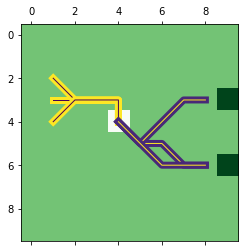

In [2]:
a = GridWorldAgent(softmax=0.1,width=10, rewardValues={39:10, 69:10})
# data = a.getLikelihoodAllPaths(4)
a.displayAllPaths(4, topthree=True)
# len(data)


In [62]:
coord = data[0][0]
print(len(coord))
print(len(np.unique(coord,axis=0)))

6
4


In [63]:
repetitive = []
nonrep = []
for path in data:
    coordlist, likelihood = val
    if len(np.unique(coordlist, axis=0)) < len(coordlist):
        repetitive.append(likelihood)
    else:
        nonrep.append(likelihood)# 1840
print(len(repetitive)) 
print(len(nonrep))

6720
0


In [3]:

with open("pathslen4.csv", 'w+') as f:
    #writer = csv.writer(f, delimiter=',')
    for val in data:
        coordlist, likelihood = val
        coords = np.array2string(coordlist).replace('\n', '')
        print(likelihood)
        print(coords)
        f.write(str(likelihood) + ',')
        f.write(coords)
        f.write('\n')

-29.3435576283
[[4 4] [3 4] [2 4] [1 4] [0 4]]
-25.9852905584
[[4 4] [3 4] [2 4] [1 4] [2 4]]
-29.4806456991
[[4 4] [3 4] [2 4] [1 4] [1 3]]
-29.4806456991
[[4 4] [3 4] [2 4] [1 4] [1 5]]
-29.3435576283
[[4 4] [3 4] [2 4] [1 4] [0 3]]
-25.9852905584
[[4 4] [3 4] [2 4] [1 4] [2 3]]
-29.3435576283
[[4 4] [3 4] [2 4] [1 4] [0 5]]
-25.9852905584
[[4 4] [3 4] [2 4] [1 4] [2 5]]
-26.3368165141
[[4 4] [3 4] [2 4] [3 4] [2 4]]
-19.1638051889
[[4 4] [3 4] [2 4] [3 4] [4 4]]
-23.0354125874
[[4 4] [3 4] [2 4] [3 4] [3 3]]
-23.0354125874
[[4 4] [3 4] [2 4] [3 4] [3 5]]
-26.3368165141
[[4 4] [3 4] [2 4] [3 4] [2 3]]
-19.1638051889
[[4 4] [3 4] [2 4] [3 4] [4 3]]
-26.3368165141
[[4 4] [3 4] [2 4] [3 4] [2 5]]
-19.1638051889
[[4 4] [3 4] [2 4] [3 4] [4 5]]
-29.6607500115
[[4 4] [3 4] [2 4] [2 3] [1 3]]
-22.8451300337
[[4 4] [3 4] [2 4] [2 3] [3 3]]
-26.5237521674
[[4 4] [3 4] [2 4] [2 3] [2 2]]
-26.5237521674
[[4 4] [3 4] [2 4] [2 3] [2 4]]
-29.6607500115
[[4 4] [3 4] [2 4] [2 3] [1 2]]
-22.845130033

[[4 4] [5 4] [5 3] [4 3] [5 4]]
-17.076233999
[[4 4] [5 4] [5 3] [6 3] [5 3]]
-8.71331784733
[[4 4] [5 4] [5 3] [6 3] [7 3]]
-13.2274093539
[[4 4] [5 4] [5 3] [6 3] [6 2]]
-13.2274093539
[[4 4] [5 4] [5 3] [6 3] [6 4]]
-17.076233999
[[4 4] [5 4] [5 3] [6 3] [5 2]]
-13.0650417422
[[4 4] [5 4] [5 3] [6 3] [7 2]]
-17.076233999
[[4 4] [5 4] [5 3] [6 3] [5 4]]
-8.71331784733
[[4 4] [5 4] [5 3] [6 3] [7 4]]
-20.9493453708
[[4 4] [5 4] [5 3] [5 2] [4 2]]
-13.003702749
[[4 4] [5 4] [5 3] [5 2] [6 2]]
-17.292496144
[[4 4] [5 4] [5 3] [5 2] [5 1]]
-17.292496144
[[4 4] [5 4] [5 3] [5 2] [5 3]]
-20.9493453708
[[4 4] [5 4] [5 3] [5 2] [4 1]]
-17.1198456488
[[4 4] [5 4] [5 3] [5 2] [6 1]]
-20.9493453708
[[4 4] [5 4] [5 3] [5 2] [4 3]]
-13.003702749
[[4 4] [5 4] [5 3] [5 2] [6 3]]
-20.9493453708
[[4 4] [5 4] [5 3] [5 4] [4 4]]
-13.003702749
[[4 4] [5 4] [5 3] [5 4] [6 4]]
-17.292496144
[[4 4] [5 4] [5 3] [5 4] [5 3]]
-17.292496144
[[4 4] [5 4] [5 3] [5 4] [5 5]]
-20.9493453708
[[4 4] [5 4] [5 3] [5 4

-23.999770051
[[4 4] [4 3] [5 3] [4 2] [3 2]]
-16.4504149101
[[4 4] [4 3] [5 3] [4 2] [5 2]]
-20.5252344494
[[4 4] [4 3] [5 3] [4 2] [4 1]]
-20.5252344494
[[4 4] [4 3] [5 3] [4 2] [4 3]]
-23.999770051
[[4 4] [4 3] [5 3] [4 2] [3 1]]
-16.4504149101
[[4 4] [4 3] [5 3] [4 2] [5 1]]
-23.999770051
[[4 4] [4 3] [5 3] [4 2] [3 3]]
-16.4504149101
[[4 4] [4 3] [5 3] [4 2] [5 3]]
-16.8641785382
[[4 4] [4 3] [5 3] [6 2] [5 2]]
-8.10298628153
[[4 4] [4 3] [5 3] [6 2] [7 2]]
-12.618996793
[[4 4] [4 3] [5 3] [6 2] [6 1]]
-13.0153538932
[[4 4] [4 3] [5 3] [6 2] [6 3]]
-16.8641785382
[[4 4] [4 3] [5 3] [6 2] [5 1]]
-16.6769263014
[[4 4] [4 3] [5 3] [6 2] [7 1]]
-16.8641785382
[[4 4] [4 3] [5 3] [6 2] [5 3]]
-8.50126238662
[[4 4] [4 3] [5 3] [6 2] [7 3]]
-23.999770051
[[4 4] [4 3] [5 3] [4 4] [3 4]]
-16.4504149101
[[4 4] [4 3] [5 3] [4 4] [5 4]]
-20.5252344494
[[4 4] [4 3] [5 3] [4 4] [4 3]]
-20.5252344494
[[4 4] [4 3] [5 3] [4 4] [4 5]]
-23.999770051
[[4 4] [4 3] [5 3] [4 4] [3 3]]
-16.4504149101
[[4 

-16.0583341135
[[4 4] [4 5] [3 5] [4 4] [5 5]]
-30.0519564168
[[4 4] [4 5] [3 5] [2 6] [1 6]]
-23.2363364389
[[4 4] [4 5] [3 5] [2 6] [3 6]]
-26.9149585727
[[4 4] [4 5] [3 5] [2 6] [2 5]]
-26.9149585727
[[4 4] [4 5] [3 5] [2 6] [2 7]]
-30.0519564168
[[4 4] [4 5] [3 5] [2 6] [1 5]]
-23.2363364389
[[4 4] [4 5] [3 5] [2 6] [3 5]]
-30.0519564168
[[4 4] [4 5] [3 5] [2 6] [1 7]]
-23.2363364389
[[4 4] [4 5] [3 5] [2 6] [3 7]]
-23.6076892543
[[4 4] [4 5] [3 5] [4 6] [3 6]]
-16.0583341135
[[4 4] [4 5] [3 5] [4 6] [5 6]]
-20.1331536527
[[4 4] [4 5] [3 5] [4 6] [4 5]]
-20.1331536527
[[4 4] [4 5] [3 5] [4 6] [4 7]]
-23.6076892543
[[4 4] [4 5] [3 5] [4 6] [3 5]]
-16.0583341135
[[4 4] [4 5] [3 5] [4 6] [5 5]]
-23.6076892543
[[4 4] [4 5] [3 5] [4 6] [3 7]]
-16.0583341135
[[4 4] [4 5] [3 5] [4 6] [5 7]]
-23.999770051
[[4 4] [4 5] [5 5] [4 5] [3 5]]
-16.4504149101
[[4 4] [4 5] [5 5] [4 5] [5 5]]
-20.5252344494
[[4 4] [4 5] [5 5] [4 5] [4 4]]
-20.5252344494
[[4 4] [4 5] [5 5] [4 5] [4 6]]
-23.999770051


-23.0354125874
[[4 4] [3 3] [3 4] [2 3] [3 3]]
-26.7140347212
[[4 4] [3 3] [3 4] [2 3] [2 2]]
-26.7140347212
[[4 4] [3 3] [3 4] [2 3] [2 4]]
-29.8510325652
[[4 4] [3 3] [3 4] [2 3] [1 2]]
-23.0354125874
[[4 4] [3 3] [3 4] [2 3] [3 2]]
-29.8510325652
[[4 4] [3 3] [3 4] [2 3] [1 4]]
-23.0354125874
[[4 4] [3 3] [3 4] [2 3] [3 4]]
-23.4067654028
[[4 4] [3 3] [3 4] [4 3] [3 3]]
-15.8574102619
[[4 4] [3 3] [3 4] [4 3] [5 3]]
-19.9322298012
[[4 4] [3 3] [3 4] [4 3] [4 2]]
-19.9322298012
[[4 4] [3 3] [3 4] [4 3] [4 4]]
-23.4067654028
[[4 4] [3 3] [3 4] [4 3] [3 2]]
-15.8574102619
[[4 4] [3 3] [3 4] [4 3] [5 2]]
-23.4067654028
[[4 4] [3 3] [3 4] [4 3] [3 4]]
-15.8574102619
[[4 4] [3 3] [3 4] [4 3] [5 4]]
-29.8510325652
[[4 4] [3 3] [3 4] [2 5] [1 5]]
-23.0354125874
[[4 4] [3 3] [3 4] [2 5] [3 5]]
-26.7140347212
[[4 4] [3 3] [3 4] [2 5] [2 4]]
-26.7140347212
[[4 4] [3 3] [3 4] [2 5] [2 6]]
-29.8510325652
[[4 4] [3 3] [3 4] [2 5] [1 4]]
-23.0354125874
[[4 4] [3 3] [3 4] [2 5] [3 4]]
-29.851032565

[[4 4] [5 3] [5 4] [6 3] [7 4]]
-24.2118255117
[[4 4] [5 3] [5 4] [4 5] [3 5]]
-16.6624703708
[[4 4] [5 3] [5 4] [4 5] [5 5]]
-20.7372899101
[[4 4] [5 3] [5 4] [4 5] [4 4]]
-20.7372899101
[[4 4] [5 3] [5 4] [4 5] [4 6]]
-24.2118255117
[[4 4] [5 3] [5 4] [4 5] [3 4]]
-16.6624703708
[[4 4] [5 3] [5 4] [4 5] [5 4]]
-24.2118255117
[[4 4] [5 3] [5 4] [4 5] [3 6]]
-16.6624703708
[[4 4] [5 3] [5 4] [4 5] [5 6]]
-17.076233999
[[4 4] [5 3] [5 4] [6 5] [5 5]]
-8.71331784733
[[4 4] [5 3] [5 4] [6 5] [7 5]]
-13.2274093539
[[4 4] [5 3] [5 4] [6 5] [6 4]]
-13.2274093539
[[4 4] [5 3] [5 4] [6 5] [6 6]]
-17.076233999
[[4 4] [5 3] [5 4] [6 5] [5 4]]
-8.71331784733
[[4 4] [5 3] [5 4] [6 5] [7 4]]
-17.076233999
[[4 4] [5 3] [5 4] [6 5] [5 6]]
-8.71331784733
[[4 4] [5 3] [5 4] [6 5] [7 6]]
-27.1002501262
[[4 4] [5 3] [4 2] [3 2] [2 2]]
-19.927238801
[[4 4] [5 3] [4 2] [3 2] [4 2]]
-23.7988461994
[[4 4] [5 3] [4 2] [3 2] [3 1]]
-23.7988461994
[[4 4] [5 3] [4 2] [3 2] [3 3]]
-27.1002501262
[[4 4] [5 3] [4 2

-19.5351580043
[[4 4] [3 5] [4 4] [3 3] [4 4]]
-19.927238801
[[4 4] [3 5] [4 4] [5 3] [4 3]]
-11.9815961791
[[4 4] [3 5] [4 4] [5 3] [6 3]]
-16.2703895742
[[4 4] [3 5] [4 4] [5 3] [5 2]]
-16.2703895742
[[4 4] [3 5] [4 4] [5 3] [5 4]]
-19.927238801
[[4 4] [3 5] [4 4] [5 3] [4 2]]
-11.9815961791
[[4 4] [3 5] [4 4] [5 3] [6 2]]
-19.927238801
[[4 4] [3 5] [4 4] [5 3] [4 4]]
-11.9815961791
[[4 4] [3 5] [4 4] [5 3] [6 4]]
-26.7081693295
[[4 4] [3 5] [4 4] [3 5] [2 5]]
-19.5351580043
[[4 4] [3 5] [4 4] [3 5] [4 5]]
-23.4067654028
[[4 4] [3 5] [4 4] [3 5] [3 4]]
-23.4067654028
[[4 4] [3 5] [4 4] [3 5] [3 6]]
-26.7081693295
[[4 4] [3 5] [4 4] [3 5] [2 4]]
-19.5351580043
[[4 4] [3 5] [4 4] [3 5] [4 4]]
-26.7081693295
[[4 4] [3 5] [4 4] [3 5] [2 6]]
-19.5351580043
[[4 4] [3 5] [4 4] [3 5] [4 6]]
-19.927238801
[[4 4] [3 5] [4 4] [5 5] [4 5]]
-11.9815961791
[[4 4] [3 5] [4 4] [5 5] [6 5]]
-16.2703895742
[[4 4] [3 5] [4 4] [5 5] [5 4]]
-16.2703895742
[[4 4] [3 5] [4 4] [5 5] [5 6]]
-19.927238801
[[4

-20.3193195976
[[4 4] [5 5] [4 6] [5 5] [4 6]]
-12.3736769757
[[4 4] [5 5] [4 6] [5 5] [6 6]]
-27.1002501262
[[4 4] [5 5] [4 6] [3 7] [2 7]]
-19.927238801
[[4 4] [5 5] [4 6] [3 7] [4 7]]
-23.7988461994
[[4 4] [5 5] [4 6] [3 7] [3 6]]
-23.7988461994
[[4 4] [5 5] [4 6] [3 7] [3 8]]
-27.1002501262
[[4 4] [5 5] [4 6] [3 7] [2 6]]
-19.927238801
[[4 4] [5 5] [4 6] [3 7] [4 6]]
-27.1002501262
[[4 4] [5 5] [4 6] [3 7] [2 8]]
-19.927238801
[[4 4] [5 5] [4 6] [3 7] [4 8]]
-20.3193195976
[[4 4] [5 5] [4 6] [5 7] [4 7]]
-12.3736769757
[[4 4] [5 5] [4 6] [5 7] [6 7]]
-16.6624703708
[[4 4] [5 5] [4 6] [5 7] [5 6]]
-16.6624703708
[[4 4] [5 5] [4 6] [5 7] [5 8]]
-20.3193195976
[[4 4] [5 5] [4 6] [5 7] [4 6]]
-12.3736769757
[[4 4] [5 5] [4 6] [5 7] [6 6]]
-20.3193195976
[[4 4] [5 5] [4 6] [5 7] [4 8]]
-16.4898198756
[[4 4] [5 5] [4 6] [5 7] [6 8]]
-20.7330832257
[[4 4] [5 5] [6 6] [5 6] [4 6]]
-12.7874406039
[[4 4] [5 5] [6 6] [5 6] [6 6]]
-17.076233999
[[4 4] [5 5] [6 6] [5 6] [5 5]]
-17.076233999
[[4

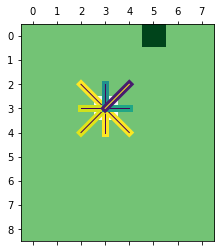

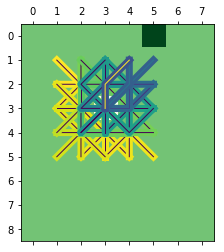

found reward, stopped counting
found reward, stopped counting
found reward, stopped counting


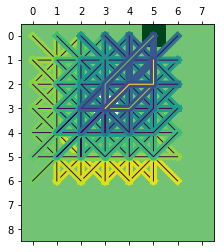

In [3]:
a = GridWorldAgent(softmax=0.1,width=8,height=9,rewardValues =  {5:10})
a.displayAllPaths(1)
a.displayAllPaths(2)
a.displayAllPaths(3)


[(array([[ 9,  9],
       [10,  8],
       [ 9,  9],
       [10,  8],
       [ 9,  9]]), -254.4628435750024), (array([[ 9,  9],
       [10,  8],
       [ 9,  9],
       [ 8, 10],
       [ 9,  9]]), -254.4628435750024), (array([[ 9,  9],
       [ 8, 10],
       [ 9,  9],
       [10,  8],
       [ 9,  9]]), -254.4628435750024), (array([[9, 9],
       [8, 9],
       [7, 8],
       [6, 7],
       [5, 6]]), -35.943610286692966), (array([[9, 9],
       [9, 8],
       [8, 7],
       [7, 6],
       [6, 5]]), -35.943610286692966), (array([[9, 9],
       [8, 8],
       [7, 7],
       [6, 6],
       [5, 5]]), -1.5543122344752201e-15)]


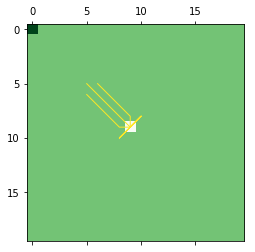

In [4]:
b = GridWorldAgent(softmax=0.01,width=20,height=20,rewardValues =  {0:10})
b.displayAllPaths(4, topthree=True)

[(array([[1, 1],
       [2, 2]]), 3.145483393606339e-05), (array([[1, 1],
       [2, 0]]), 0.125)]


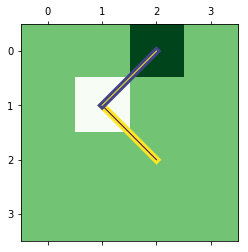

In [14]:
d = GridWorldAgent(softmax=0.1,width=4,height=4,rewardValues =  {2:10})
d.displayAllPaths(1, topthree=True)

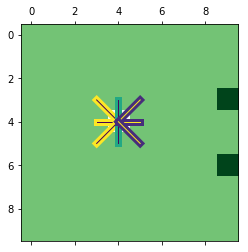

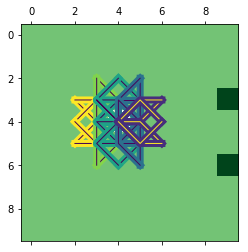

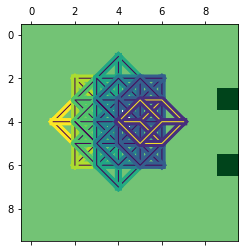

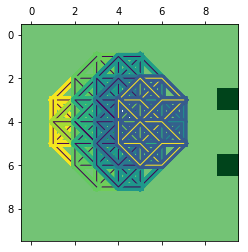

[(array([[4, 4],
       [4, 3],
       [4, 4],
       [3, 4],
       [2, 3],
       [1, 4]]), 4.98591903177997e-16), (array([[4, 4],
       [4, 5],
       [4, 4],
       [5, 5],
       [6, 4],
       [7, 4]]), 1.1404932520456218e-06)]


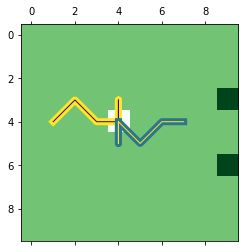

In [4]:
c = GridWorldAgent(softmax=0.1,width=10,height=10,rewardValues =  {39:10, 69:10})
c.displayAllPaths(1)
c.displayAllPaths(2)
c.displayAllPaths(3)
c.displayAllPaths(4)
c.displayAllPaths(5, topthree = True)

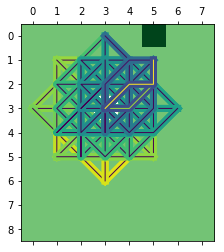

In [5]:
a.displayAllPaths(3)

In [6]:
b = GridWorldAgent(softmax=0.1,width=10,height=10,rewardValues =  {0:10, 30:10, 60:10})
b.displayAllPaths(1)
b.displayAllPaths(2)≈
b.displayAllPaths(3)

SyntaxError: invalid syntax (<ipython-input-6-17adb8ae15d9>, line 3)

In [ ]:
b = GridWorldAgent(softmax=0.1,width=10,height=10,rewardValues =  {0:10, 29:10, 59:10, 70:10})
b.displayAllPaths(1)
b.displayAllPaths(2)
b.displayAllPaths(3)